In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



%matplotlib inline

In [ ]:
trn = pd.read_csv("/content/kdd_train.csv")

In [ ]:
trn.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
trn.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
trn.nunique()

,0
duration,2981
protocol_type,3
service,70
flag,11
src_bytes,3341
dst_bytes,9326
land,2
wrong_fragment,3
urgent,4
hot,28


In [ ]:
trn.duplicated().sum()

np.int64(0)

In [ ]:
types = trn["labels"].unique()
types

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [ ]:
types = types[1:]
types

array(['neptune', 'warezclient', 'ipsweep', 'portsweep', 'teardrop',
       'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd',
       'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap',
       'warezmaster', 'phf', 'land', 'loadmodule', 'spy', 'perl'],
      dtype=object)

In [ ]:
trn["labels"].replace(to_replace=types,value="attacking", inplace = True)

<ipython-input-14-cf270ae3cc4d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trn["labels"].replace(to_replace=types,value="attacking", inplace = True)


In [ ]:
trn.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attacking
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
fig = px.pie(trn, values=trn['labels'].value_counts(), names=trn['labels'].unique(), title='Labels',width = 500, height = 500)
fig.show()

<Axes: xlabel='count', ylabel='protocol_type'>

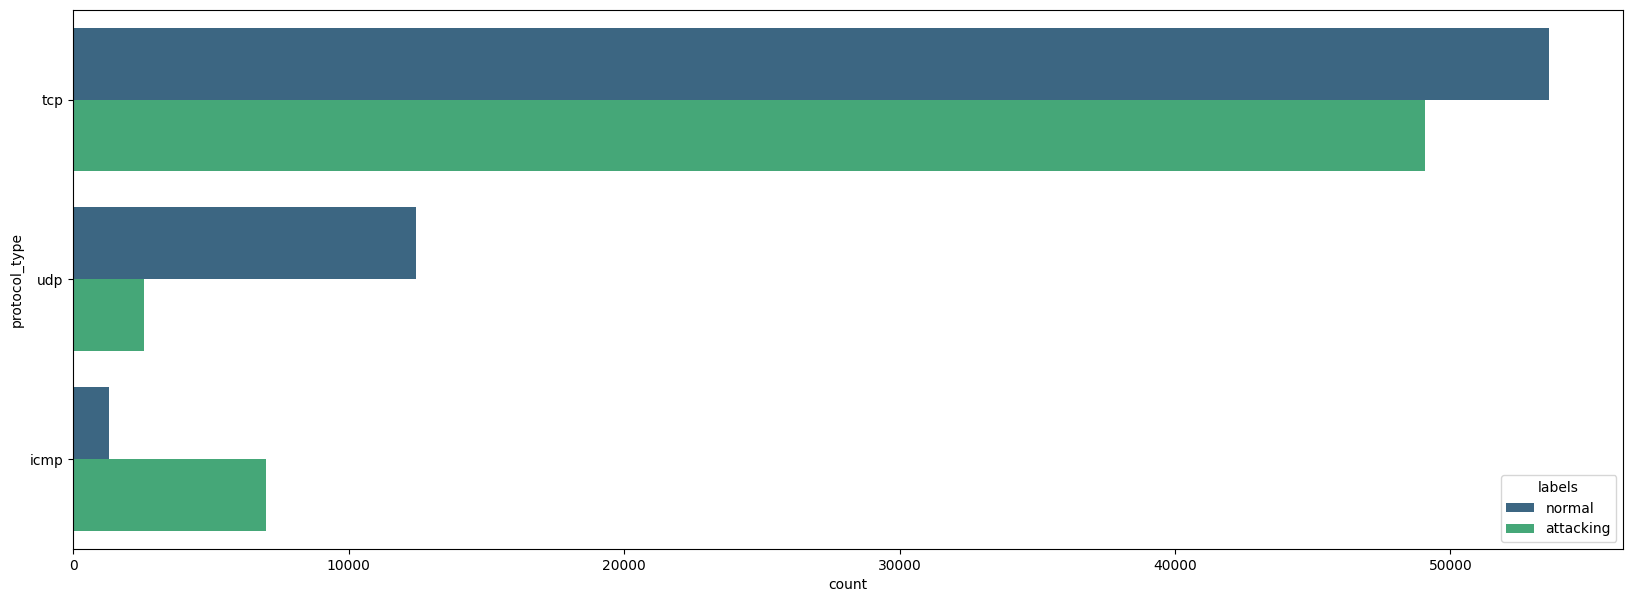

In [ ]:
plt.figure(figsize = (20,7))
sns.countplot(data=trn, y=trn.protocol_type , hue = 'labels', palette="viridis")

<Axes: xlabel='count', ylabel='protocol_type'>

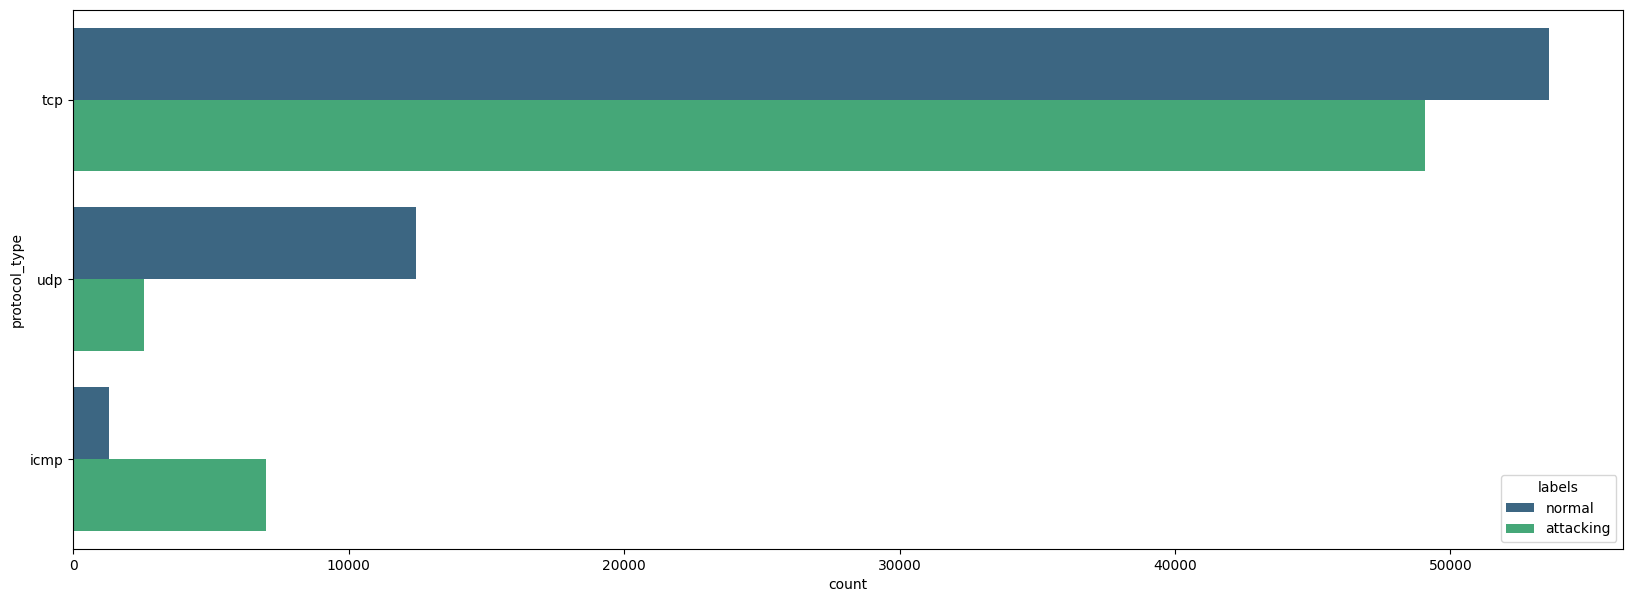

In [ ]:
plt.figure(figsize = (20,7))
sns.countplot(data=trn, y=trn.protocol_type, hue="labels" , palette="viridis")

<Axes: xlabel='count', ylabel='service'>

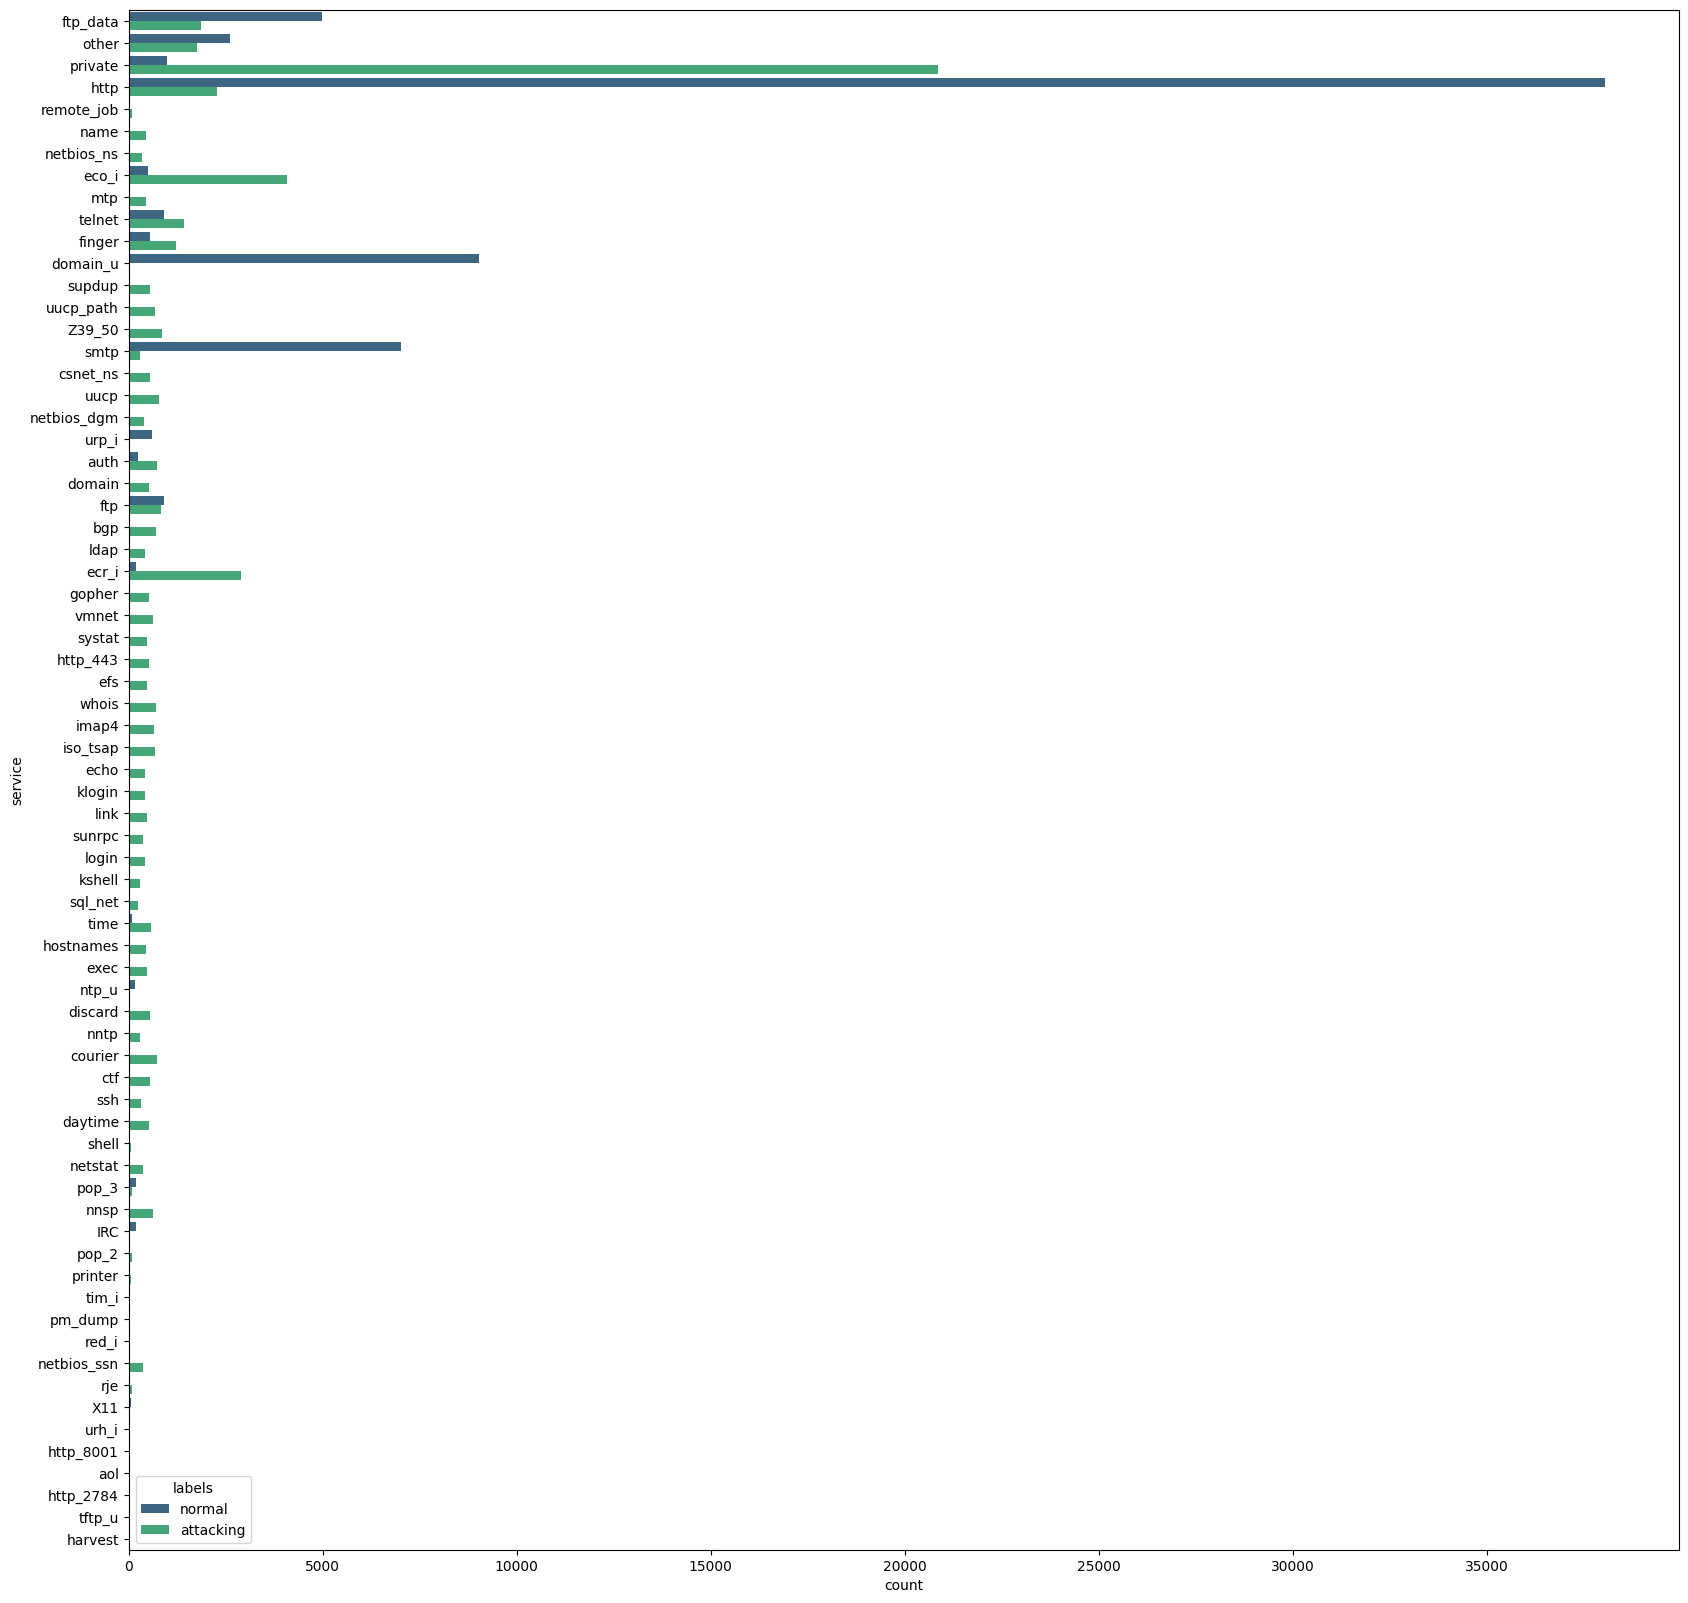

In [ ]:
plt.figure(figsize = (20,20))
sns.countplot(data=trn, y=trn.service, hue = 'labels', palette="viridis")

<Axes: xlabel='count', ylabel='service'>

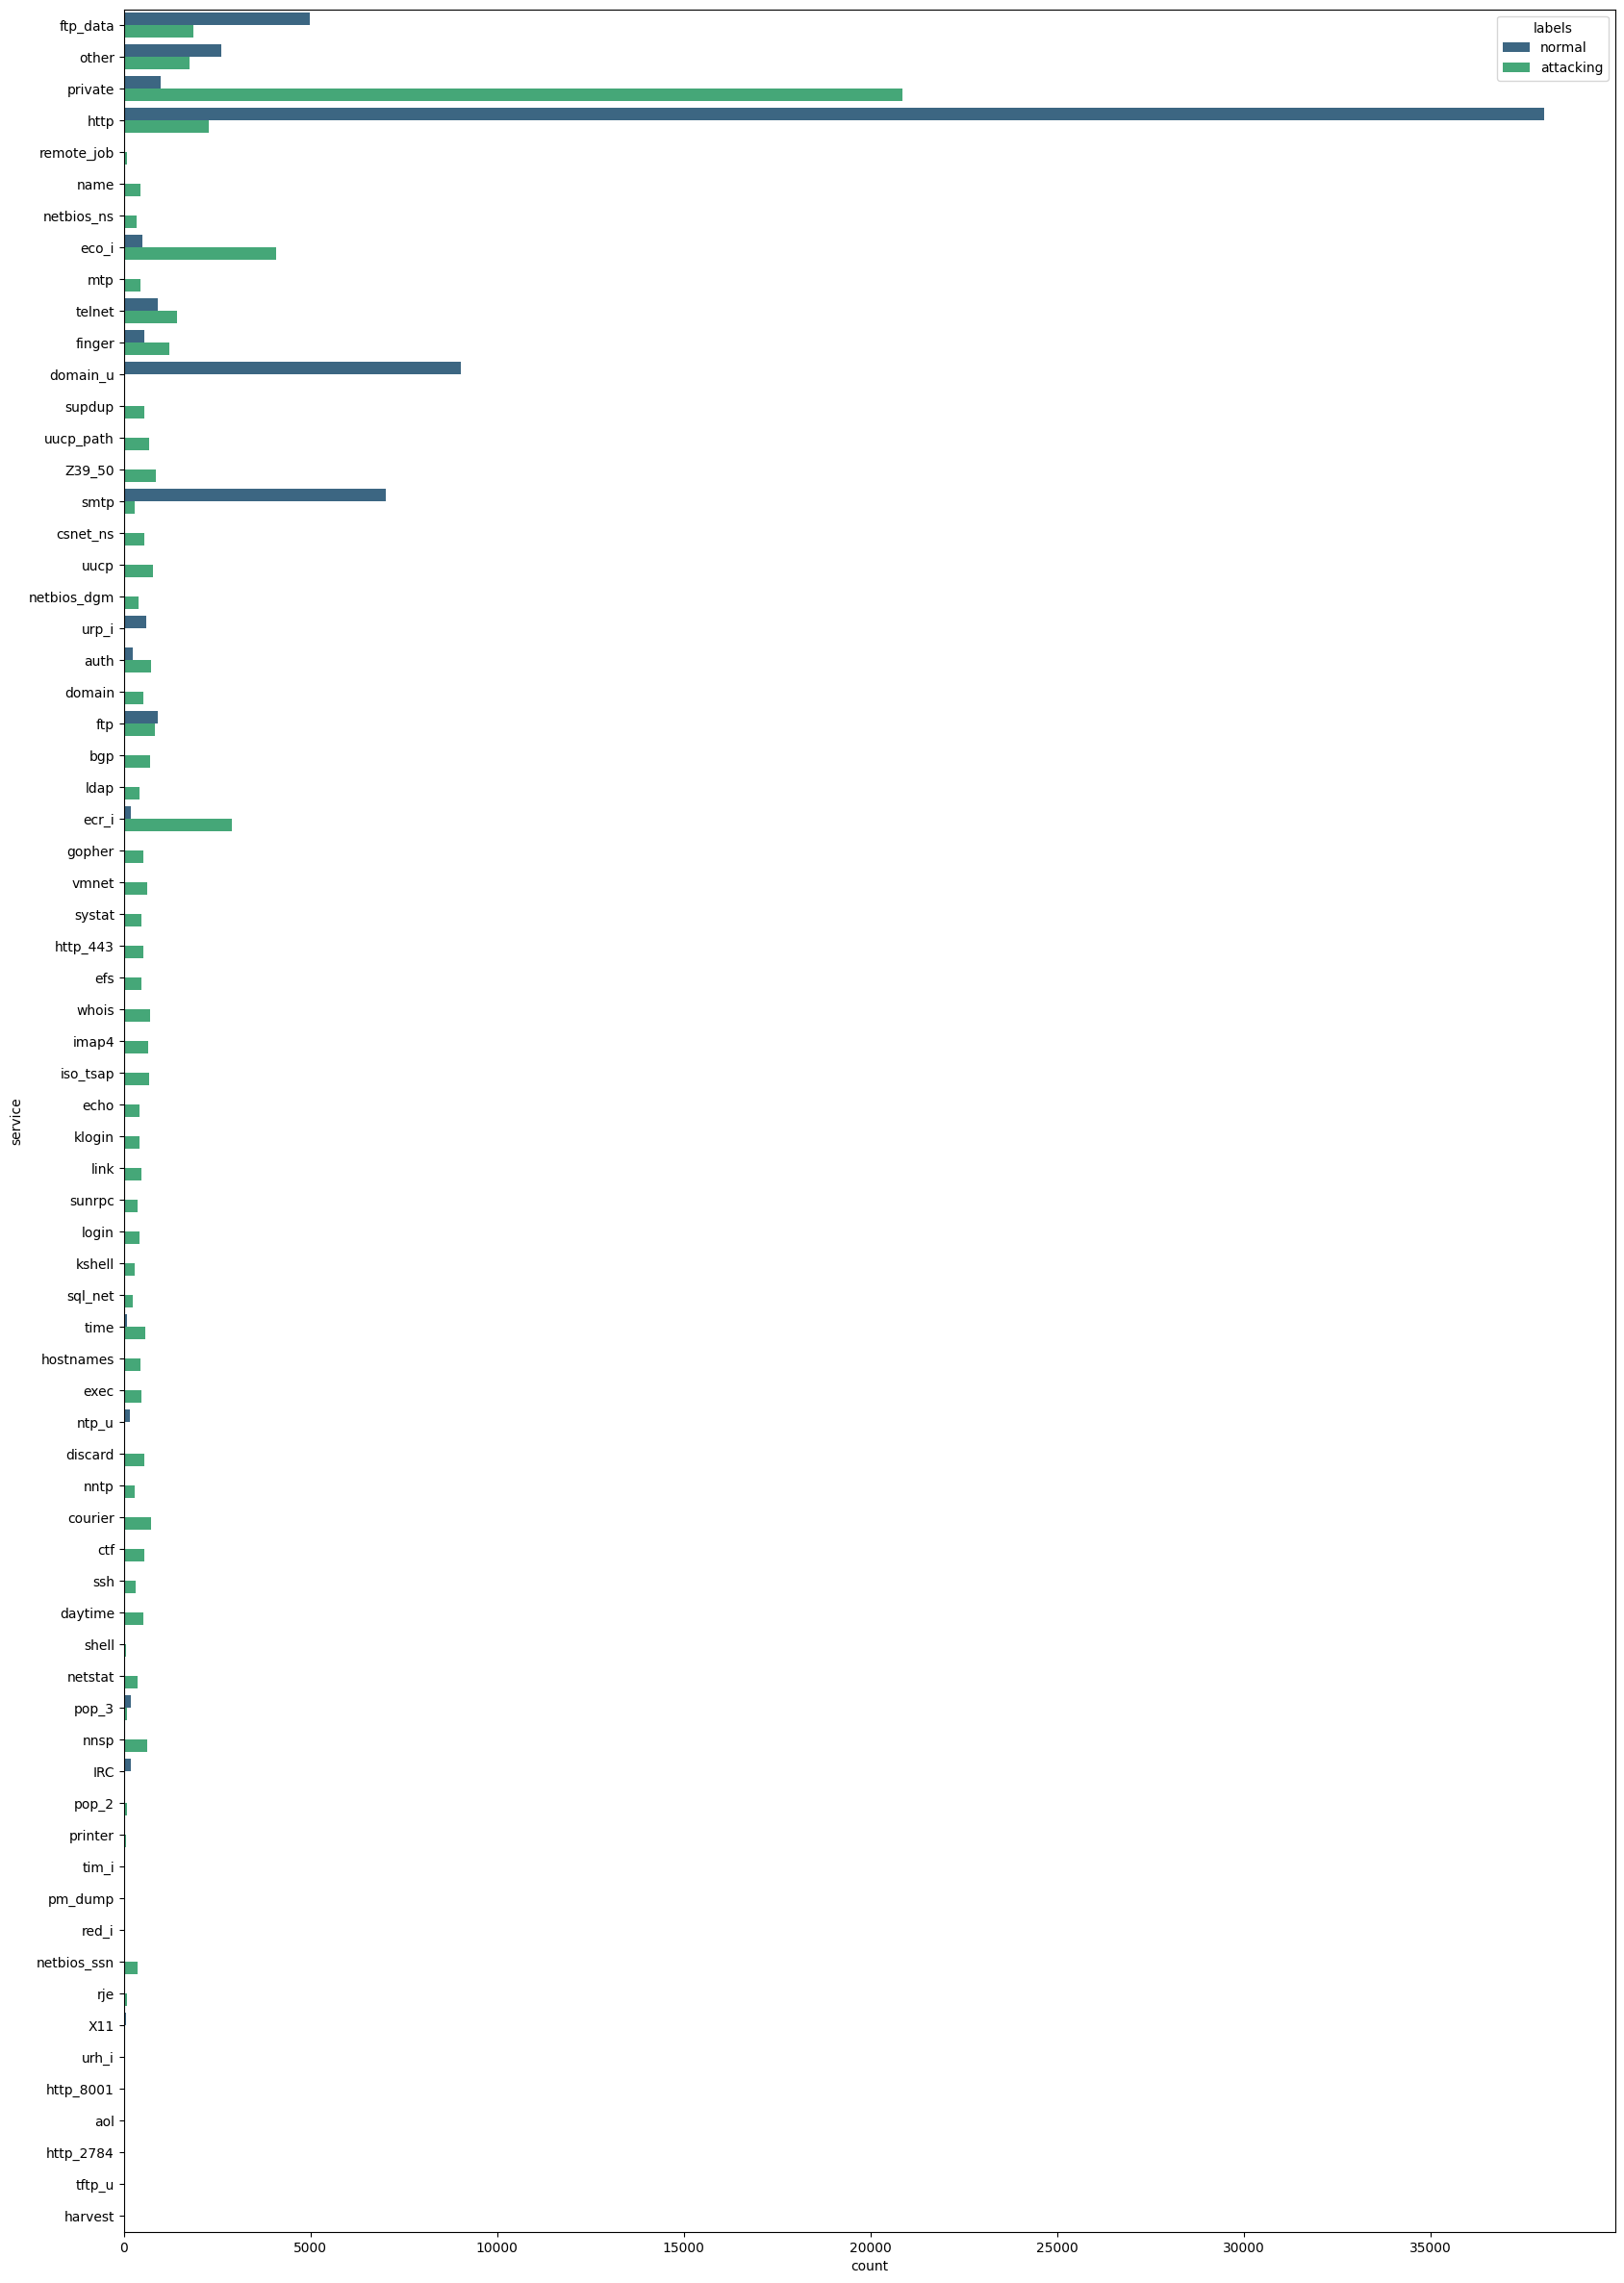

In [ ]:
plt.figure(figsize = (20,30))
sns.countplot(data=trn, y=trn.service, hue="labels" , palette="viridis")

<Axes: xlabel='count', ylabel='flag'>

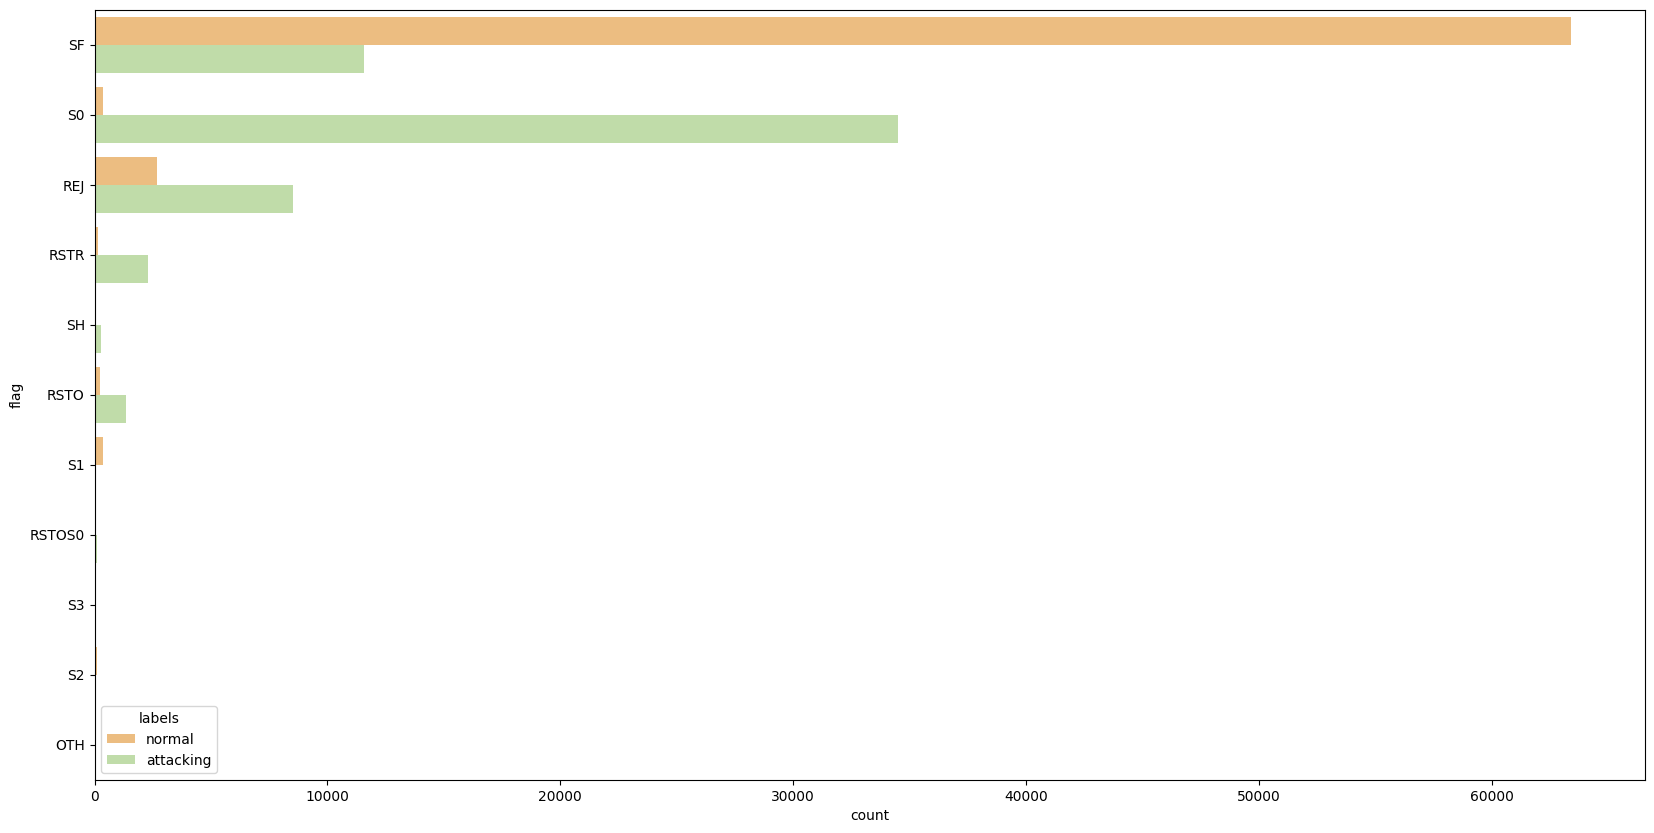

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(data=trn, y=trn.flag,hue = 'labels', palette="Spectral")

<Axes: xlabel='count', ylabel='flag'>

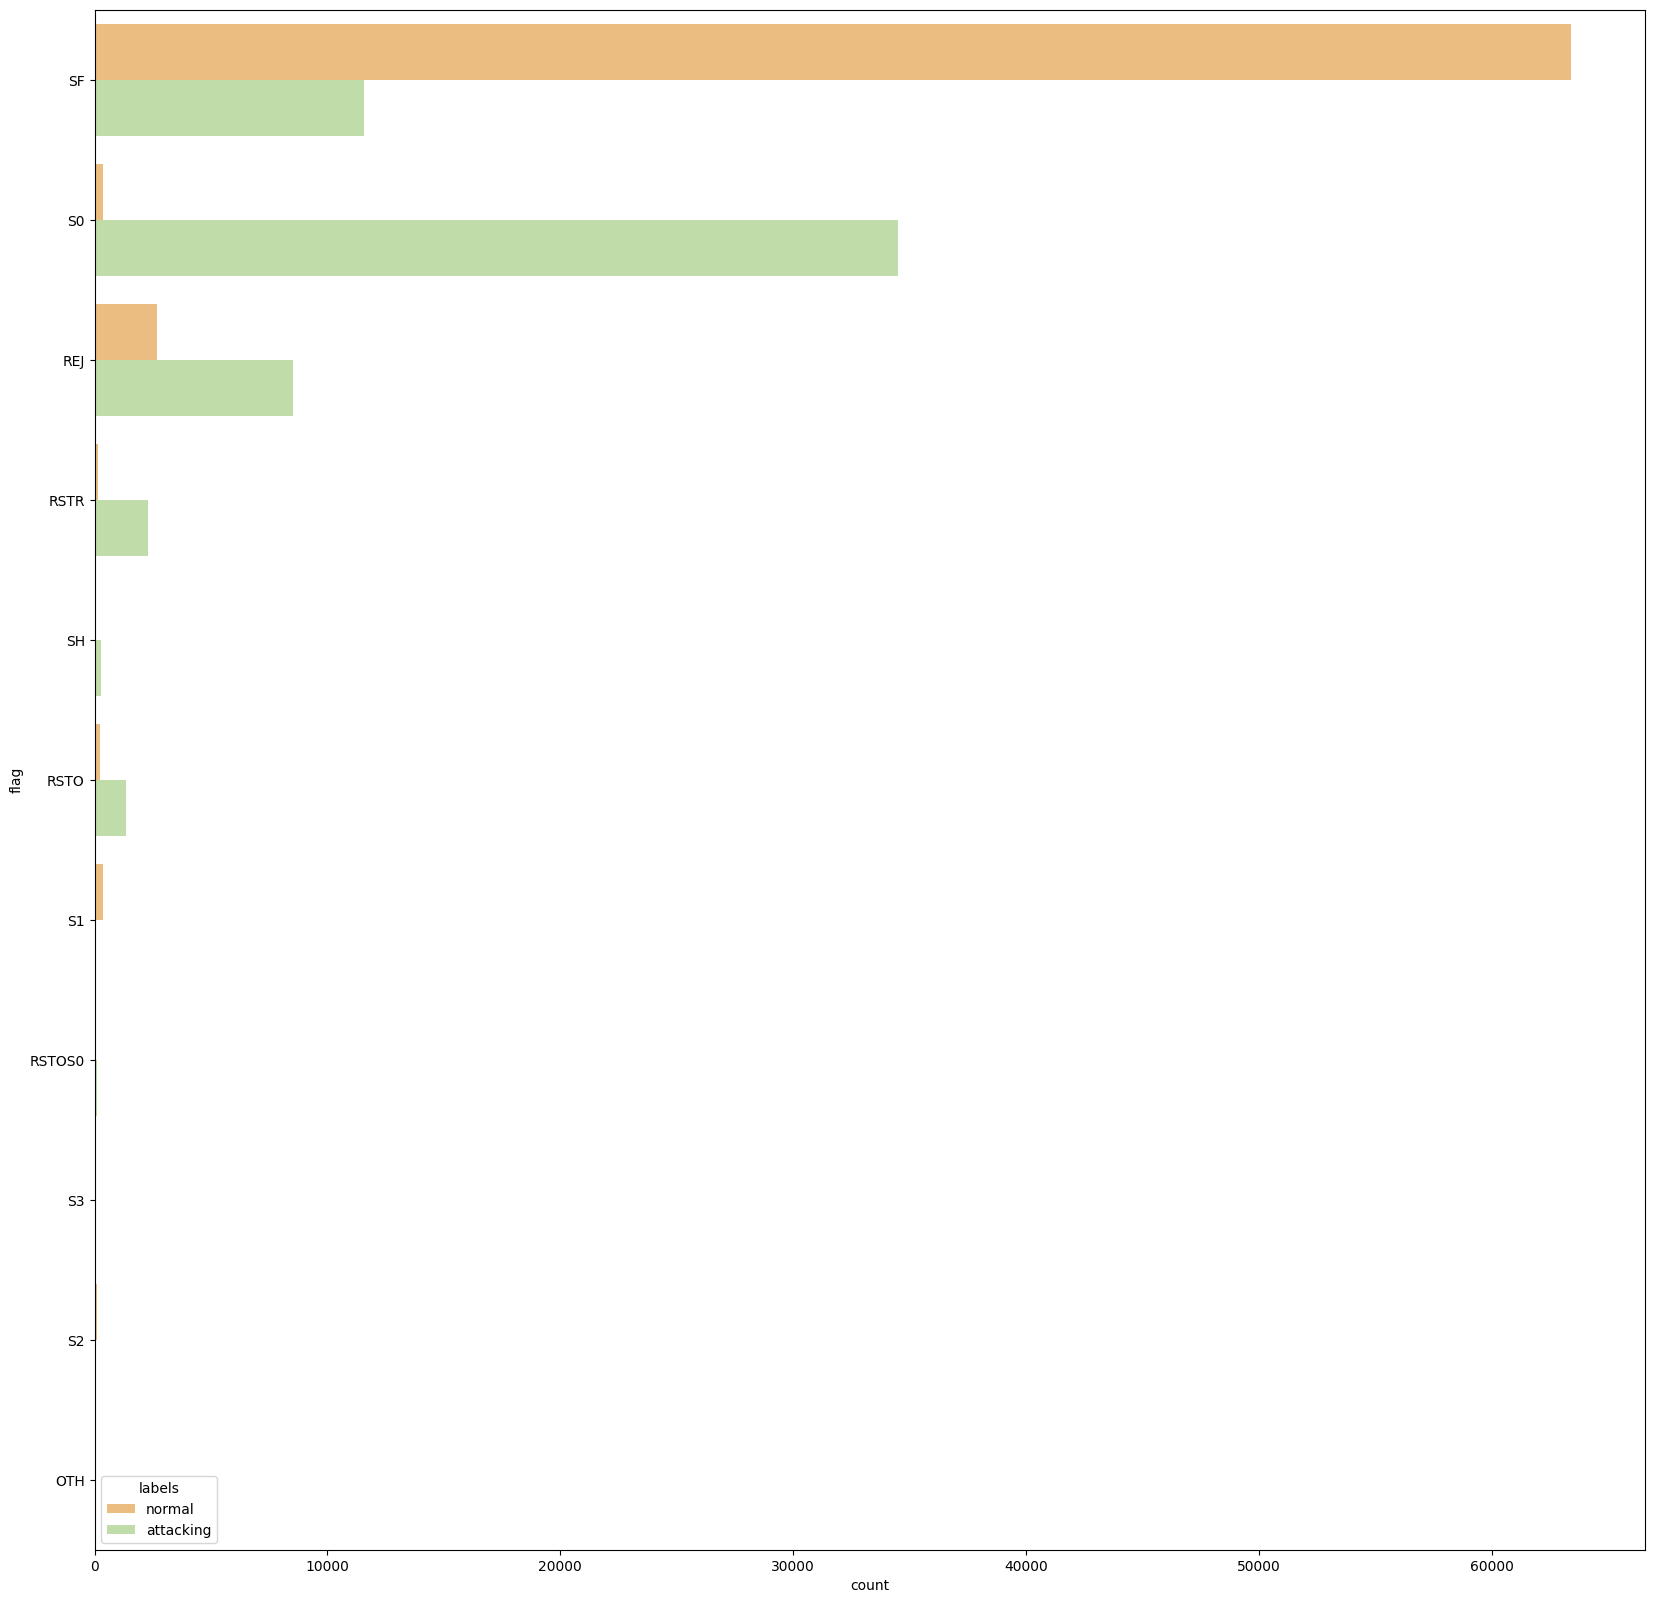

In [ ]:
plt.figure(figsize = (20,20))
sns.countplot(data=trn, y=trn.flag, hue="labels" , palette="Spectral")

In [ ]:
c = len(trn.select_dtypes(include=["number"]).columns)
c

38

In [ ]:
cols = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

In [ ]:
def create_plot_pivot(df, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = df.groupby([x_column, 'labels']).size() \
    .reset_index().pivot(columns='labels', index=x_column, values=0)
    return _df_plot

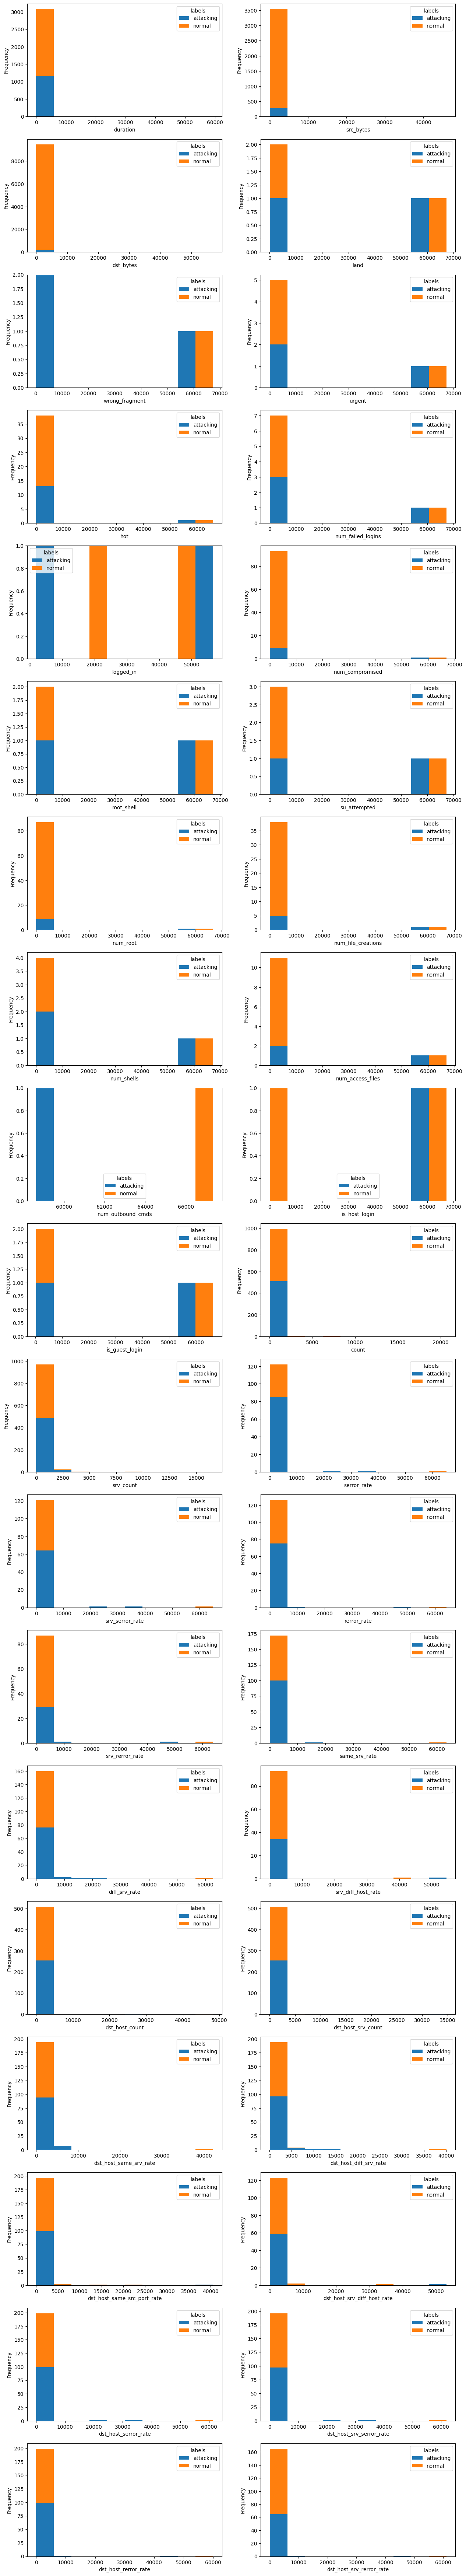

In [ ]:
fig, ax = plt.subplots(19, 2, figsize=(15,90))
axe = ax.ravel()

for i in range(c):
    create_plot_pivot(trn, cols[i]).plot(kind='hist',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])

fig.show()

In [ ]:
for col in trn.select_dtypes(include=["object"]):
    print(col)

protocol_type
service
flag
labels


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['protocol_type','service','flag','labels']

for i in cols:
    en = LabelEncoder()

    trn[i] = en.fit_transform(trn[i])

In [ ]:
trn.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


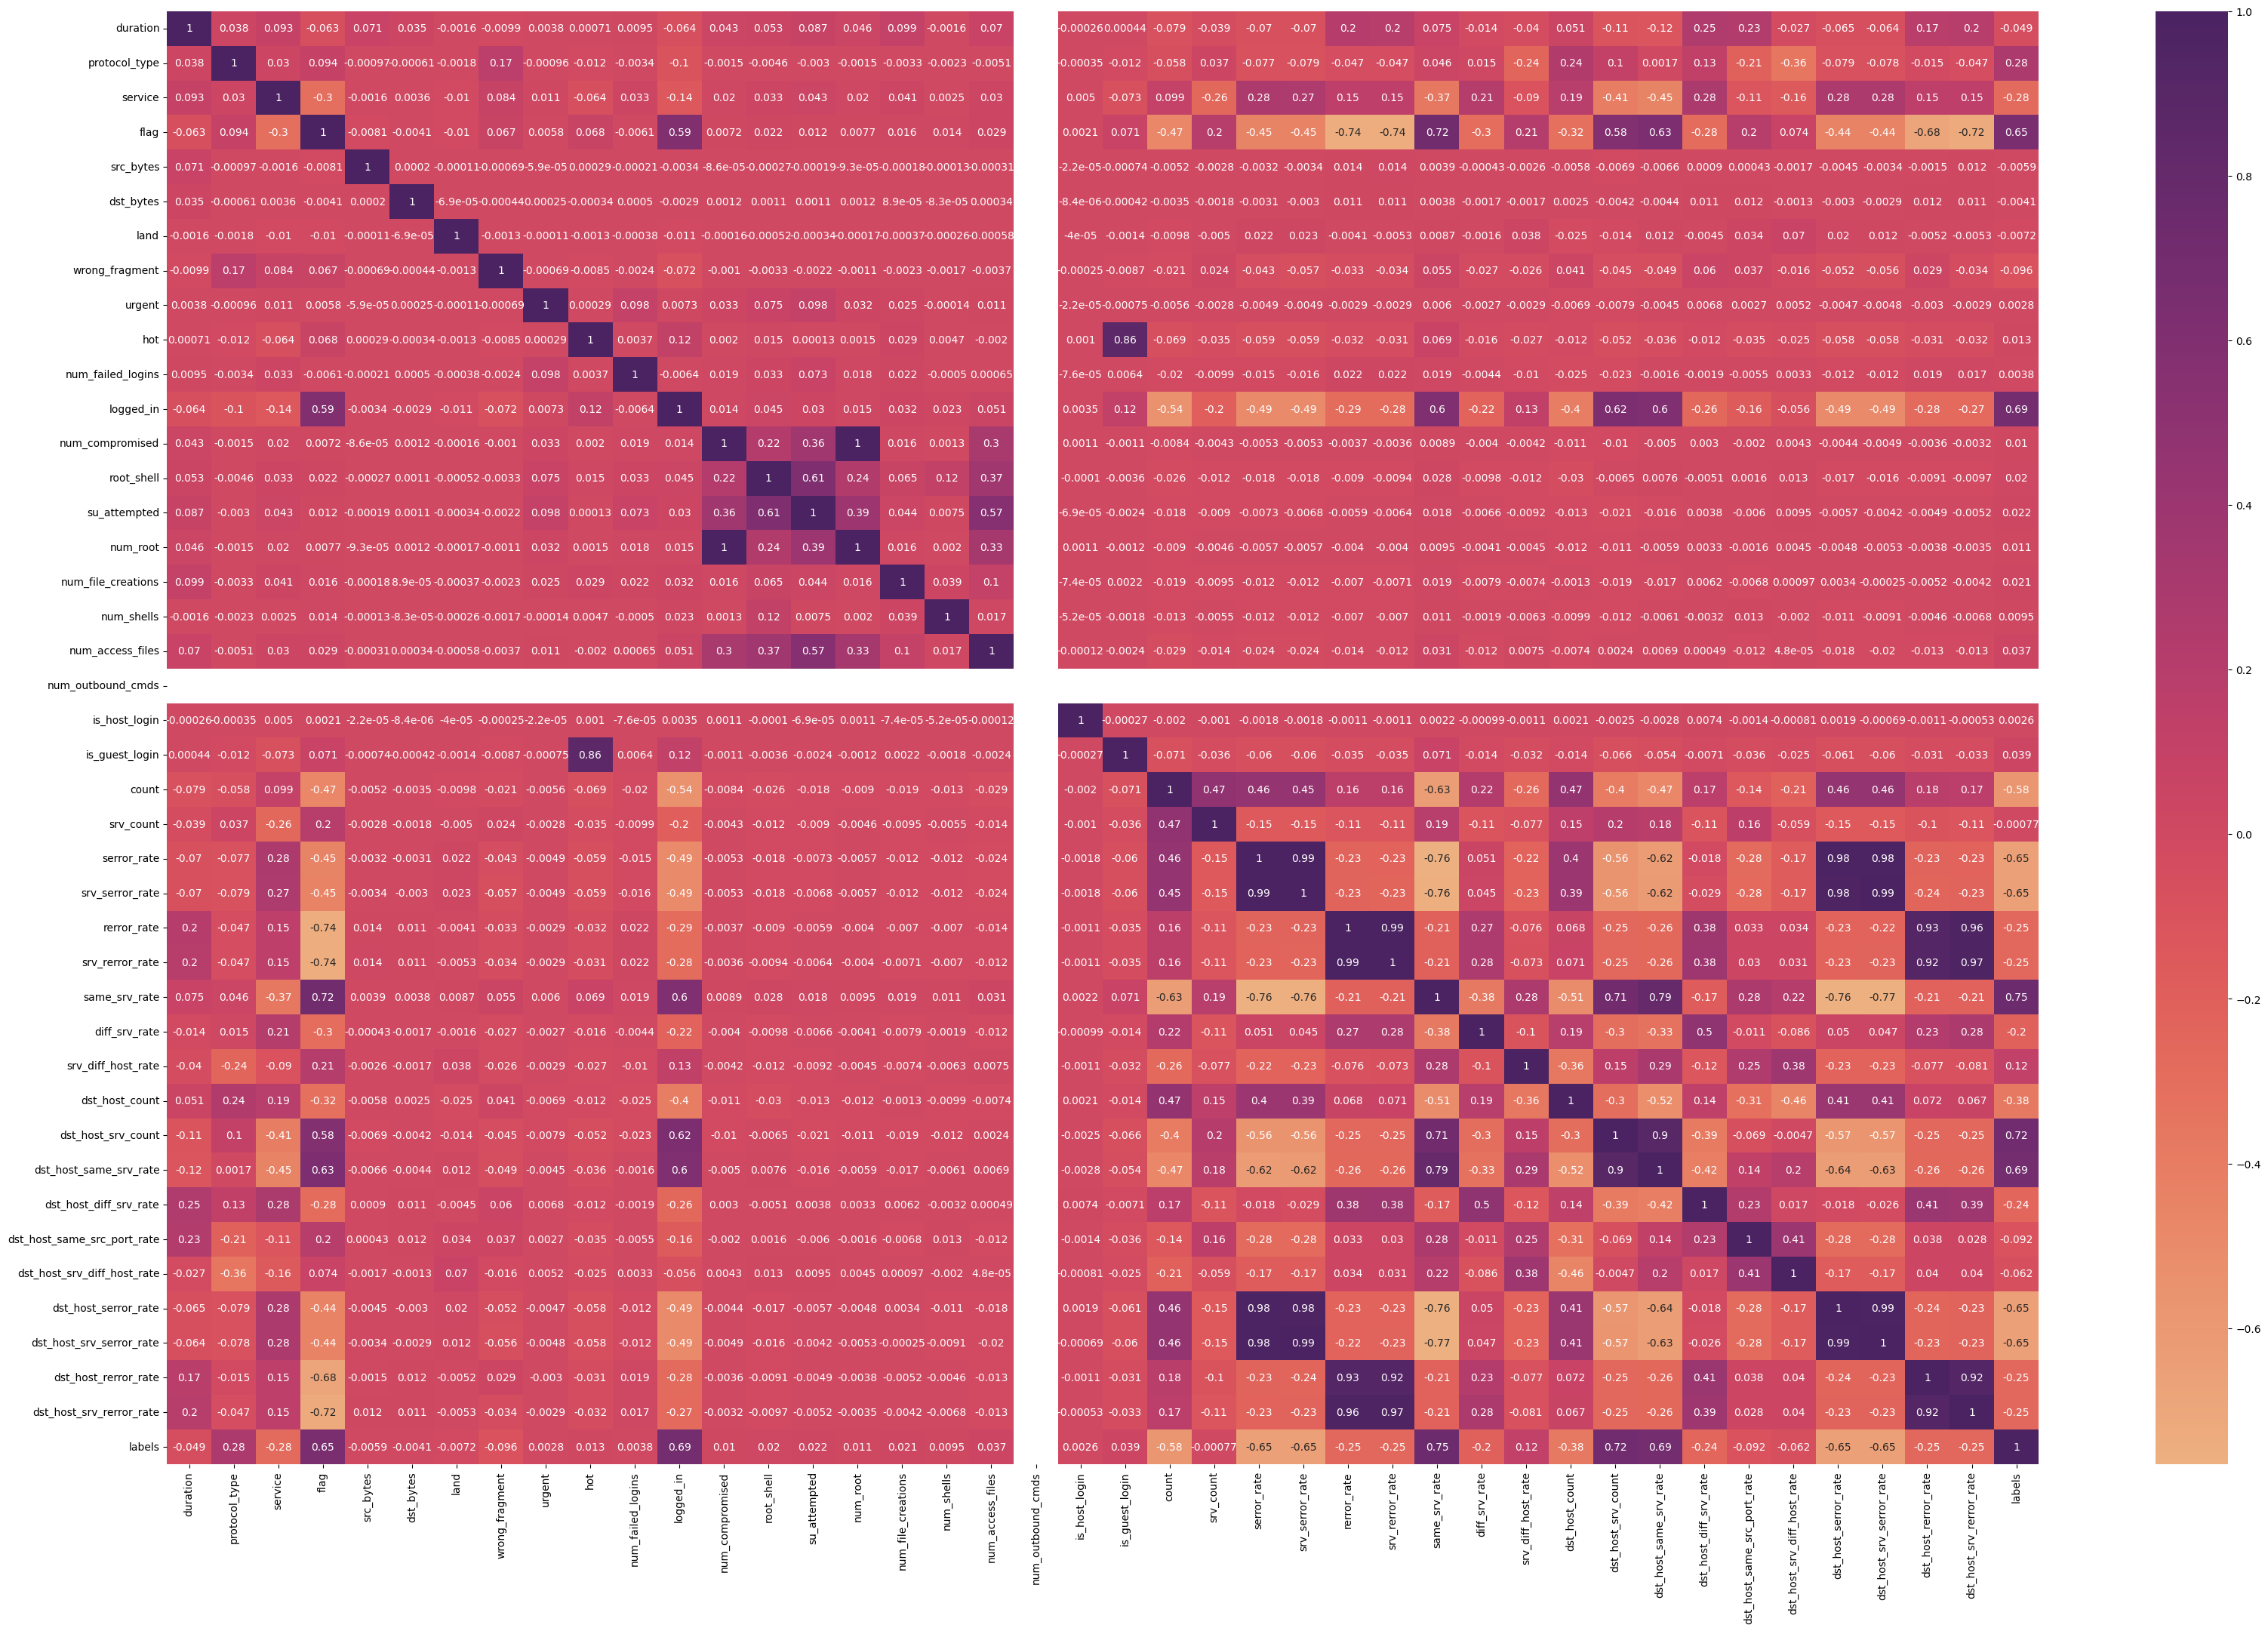

In [ ]:
plt.figure(figsize=(40,25))
sns.heatmap(trn.corr(),annot= True,cmap = 'flare')
plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = trn.corr().abs()
corr_matrix

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
duration,1.000000,0.038241,0.092858,0.063390,0.070737,0.034878,0.001553,0.009866,0.003830,0.000705,...,0.109776,0.116005,0.254195,0.228737,0.026669,0.064948,0.064361,0.173815,0.199024,0.048785
protocol_type,0.038241,1.000000,0.029994,0.093668,0.000974,0.000608,0.001757,0.169535,0.000965,0.011857,...,0.103919,0.001702,0.131380,0.209105,0.356183,0.079398,0.077925,0.015434,0.046938,0.281355
service,0.092858,0.029994,1.000000,0.304014,0.001631,0.003596,0.009952,0.084404,0.010980,0.064066,...,0.407696,0.452696,0.284072,0.111163,0.156211,0.281635,0.277594,0.150666,0.148405,0.276548
flag,0.063390,0.093668,0.304014,1.000000,0.008114,0.004096,0.010373,0.067214,0.005811,0.068437,...,0.582687,0.630118,0.283607,0.195689,0.073773,0.443441,0.443225,0.683310,0.718778,0.647073
src_bytes,0.070737,0.000974,0.001631,0.008114,1.000000,0.000204,0.000109,0.000693,0.000059,0.000295,...,0.006861,0.006572,0.000900,0.000431,0.001655,0.004503,0.003397,0.001468,0.012449,0.005921
dst_bytes,0.034878,0.000608,0.003596,0.004096,0.000204,1.000000,0.000069,0.000440,0.000248,0.000344,...,0.004224,0.004424,0.011031,0.011747,0.001281,0.003024,0.002944,0.011729,0.011223,0.004118
land,0.001553,0.001757,0.009952,0.010373,0.000109,0.000069,1.000000,0.001261,0.000109,0.001340,...,0.014159,0.011597,0.004516,0.033851,0.070474,0.019840,0.012276,0.005222,0.005303,0.007191
wrong_fragment,0.009866,0.169535,0.084404,0.067214,0.000693,0.000440,0.001261,1.000000,0.000692,0.008508,...,0.045240,0.048733,0.059797,0.037177,0.016252,0.051917,0.055917,0.028890,0.033682,0.095905
urgent,0.003830,0.000965,0.010980,0.005811,0.000059,0.000248,0.000109,0.000692,1.000000,0.000293,...,0.007897,0.004489,0.006840,0.002741,0.005176,0.004749,0.004834,0.002999,0.002912,0.002787
hot,0.000705,0.011857,0.064066,0.068437,0.000295,0.000344,0.001340,0.008508,0.000293,1.000000,...,0.051864,0.036293,0.012293,0.034536,0.024715,0.058222,0.058214,0.030555,0.031670,0.013083


In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [ ]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_rerror_rate']

In [ ]:
# Drop features
trn.drop(to_drop, axis=1, inplace=True)

In [ ]:
X_trn = trn.drop(['labels'] , axis = 1).values
Y_trn = trn['labels'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_trn = scaler.fit_transform(X_trn)

In [ ]:
X_trn.shape

(125973, 35)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_trn, x_tst, y_trn, y_tst = train_test_split(X_trn, Y_trn, test_size = 0.30)

In [ ]:
x_trn.shape

(88181, 35)

In [ ]:
x_tst.shape

(37792, 35)

In [ ]:
from sklearn import svm
from sklearn import metrics

In [ ]:
linear_svm = svm.SVC(kernel='linear')

linear_svm.fit(x_trn, y_trn)

y_pred_linear = linear_svm.predict(x_tst)

In [ ]:
y_linear = linear_svm.predict(x_trn)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_trn, y_linear))

Accuracy: 0.9588233292886222


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_tst, y_pred_linear))

Accuracy: 0.9570279424216765


In [ ]:
poly_svm = svm.SVC(kernel='poly', degree=3)

poly_svm.fit(x_trn, y_trn)

y_pred_poly = poly_svm.predict(x_tst)

In [ ]:
y__poly = poly_svm.predict(x_trn)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_trn, y__poly))

Accuracy: 0.9914947664462866


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_tst, y_pred_poly))

Accuracy: 0.9907917019475021


In [ ]:
rbf_svm = svm.SVC(kernel='rbf')

rbf_svm.fit(x_trn, y_trn)

y_pred_rbf = rbf_svm.predict(x_tst)

In [ ]:
y_rbf = rbf_svm.predict(x_trn)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_trn, y_rbf))

Accuracy: 0.9919823998366996


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_tst, y_pred_rbf))

Accuracy: 0.9916649026248942


In [ ]:
sigmoid_svm = svm.SVC(kernel='sigmoid',)

sigmoid_svm.fit(x_trn, y_trn)

y_pred_sigmoid = sigmoid_svm.predict(x_tst)

In [ ]:
y_sigmoid = sigmoid_svm.predict(x_trn)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_trn, y_sigmoid))

Accuracy: 0.8551161814903437


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_tst, y_pred_sigmoid))

Accuracy: 0.8521115580016935


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 0.01],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear','poly','rbf']}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=2)

# fitting the model for grid search
grid.fit(x_trn, y_trn)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END .C=0.1, gamma=scale, kernel=linear;, score=0.953 total time=  26.2s
[CV 2/2] END .C=0.1, gamma=scale, kernel=linear;, score=0.959 total time=  26.0s
[CV 1/2] END ...C=0.1, gamma=scale, kernel=poly;, score=0.974 total time=  28.2s
[CV 2/2] END ...C=0.1, gamma=scale, kernel=poly;, score=0.973 total time=  32.4s
[CV 1/2] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.982 total time=  27.5s
[CV 2/2] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.980 total time=  28.0s
[CV 1/2] END ..C=0.1, gamma=auto, kernel=linear;, score=0.953 total time=  25.8s
[CV 2/2] END ..C=0.1, gamma=auto, kernel=linear;, score=0.959 total time=  25.5s
[CV 1/2] END ....C=0.1, gamma=auto, kernel=poly;, score=0.973 total time=  28.9s
[CV 2/2] END ....C=0.1, gamma=auto, kernel=poly;, score=0.973 total time=  31.9s
[CV 1/2] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.982 total time=  27.5s
[CV 2/2] END .....C=0.1, gamma=auto, kernel=rbf;

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 0.01], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=0.1, gamma='auto')

In [ ]:
grid_predictions = grid.predict(x_tst)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_tst, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17625
           1       0.99      0.99      0.99     20167

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



In [ ]:
from sklearn import metrics

# Confusion matrix.
conf_mat = metrics.confusion_matrix(y_tst,grid_predictions)
print(conf_mat)

[[17365   260]
 [  245 19922]]


In [ ]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.987
Sensitvity  = 0.988
Specificity = 0.985
Precision   = 0.987


In [ ]:
FPR, TPR, cutoffs = metrics.roc_curve(y_tst,grid_predictions,pos_label=1)      # positive label = 1.

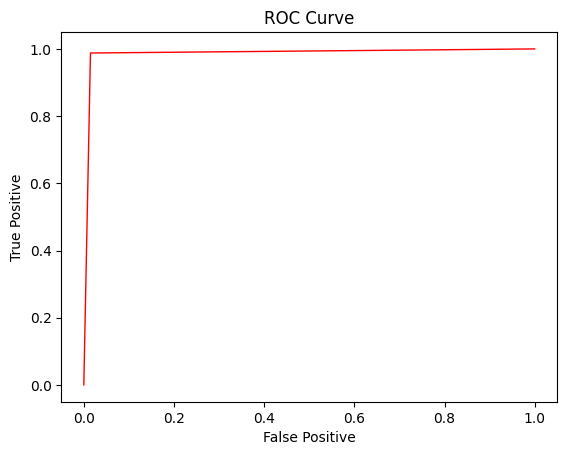

In [ ]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.svm import SVC as svc

In [ ]:
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}

In [ ]:
mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

In [ ]:
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc)

In [ ]:
result = rand_search.fit(x_trn, y_trn) # rbf kernel 'default'

NameError: name 'rand_search' is not defined

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.svm import SVC as svc

# Define parameter distributions for RandomizedSearchCV
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}

# Create SVC model with probability estimates and random state
mdl = svc(probability=True, random_state=1)
auc = make_scorer(roc_auc_score)

# Create RandomizedSearchCV object
rand_search = RandomizedSearchCV(mdl, param_distributions=rand_list, n_iter=20, n_jobs=4, cv=3, random_state=2017, scoring=auc)

# Fit the model using RandomizedSearchCV
result = rand_search.fit(x_trn, y_trn) # rbf kernel 'default'

In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
rand_predictions = rand_search.predict(x_tst)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_tst, rand_predictions))

In [ ]:
from sklearn import metrics

# Confusion matrix.
conf_mat = metrics.confusion_matrix(y_tst,rand_predictions)
print(conf_mat)

In [ ]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

In [ ]:
FPR, TPR, cutoffs = metrics.roc_curve(y_tst,rand_predictions,pos_label=1)      # positive label = 1.

In [ ]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()